In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
# Load the data from the file
data = pd.read_csv('30_Auto_theft.csv')

# Select relevant attributes
selected_attributes = ['Auto_Theft_Coordinated/Traced', 'Auto_Theft_Recovered', 'Auto_Theft_Stolen']
X = data[selected_attributes]
X = X.dropna()


In [10]:
# Standardize the data 
X = (X - X.mean()) / X.std()

In [12]:

# Apply K-Means clustering with n_init explicitly set to 10
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

labels = kmeans.fit_predict(X)

In [13]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

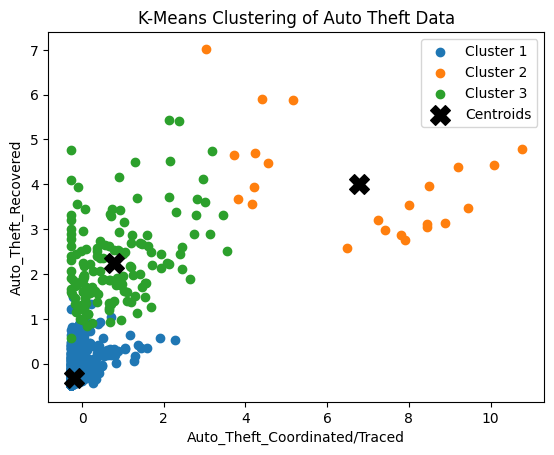

In [15]:
# Scatter plot the data points with different colors for each cluster
for i in range(3):
    cluster = X[labels == i]
    plt.scatter(cluster['Auto_Theft_Coordinated/Traced'], cluster['Auto_Theft_Recovered'], label=f'Cluster {i+1}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering of Auto Theft Data')
plt.xlabel('Auto_Theft_Coordinated/Traced')
plt.ylabel('Auto_Theft_Recovered')
plt.legend()
plt.show()

C:\Users\Deep Salunkhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


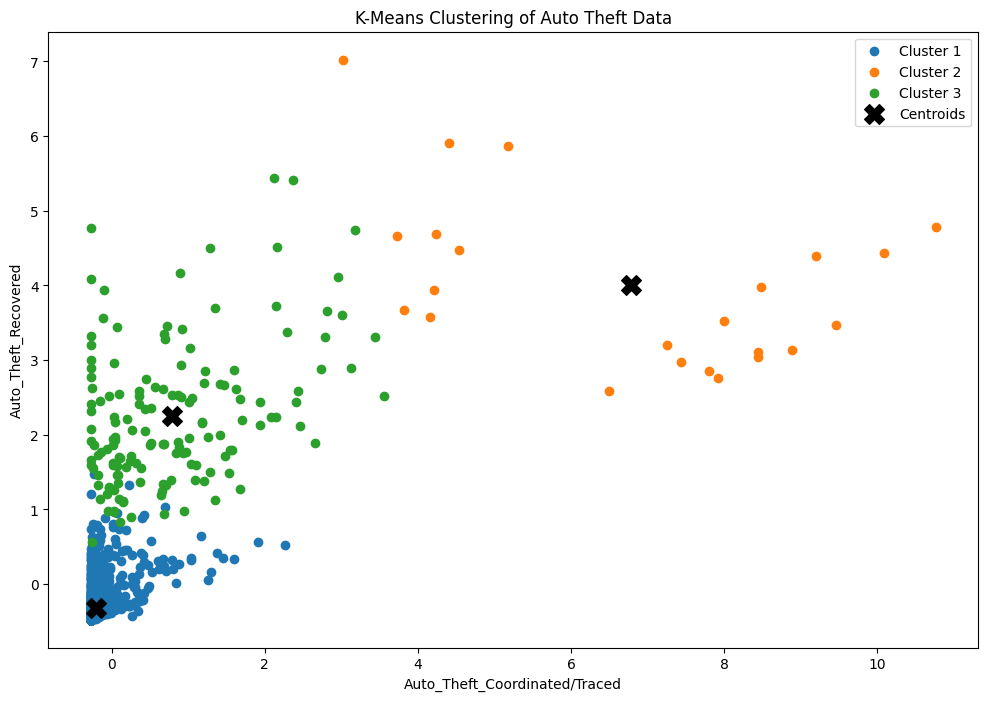

In [20]:
# Load the data from the file
data = pd.read_csv('30_Auto_theft.csv')

# Select relevant attributes including 'Area_Name'
selected_attributes = ['Auto_Theft_Coordinated/Traced', 'Auto_Theft_Recovered', 'Auto_Theft_Stolen', 'Area_Name']
X = data[selected_attributes]

# Drop rows with missing values
X = X.dropna()

# Encode 'Area_Name' as numeric categories
X['Area_Name'] = pd.Categorical(X['Area_Name'])
X['Area_Code'] = X['Area_Name'].cat.codes
X = X.drop('Area_Name', axis=1)

# Standardize the data (optional but can be useful)
X = (X - X.mean()) / X.std()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X[['Auto_Theft_Coordinated/Traced', 'Auto_Theft_Recovered', 'Auto_Theft_Stolen']])

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot the data points with different colors for each cluster
for i in range(3):
    cluster = X[labels == i]
    plt.scatter(cluster['Auto_Theft_Coordinated/Traced'], cluster['Auto_Theft_Recovered'], label=f'Cluster {i+1}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering of Auto Theft Data')
plt.xlabel('Auto_Theft_Coordinated/Traced')
plt.ylabel('Auto_Theft_Recovered')
plt.legend()
plt.show()